In [74]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm

## Make up some data
Pretend you have data on website revenue for 100 days before and after a website change (at day 50)


In [139]:
#x is the day number 
time_1 = np.arange(0,50)
time_2 = np.arange(50,100)
time=np.append(time_1,time_2)

#create revenue data
#create some random noise
random.seed(222) 
delta_1 = np.random.uniform(0,5, size=(50,))
random.seed(123) 
delta_2 = np.random.uniform(0,5, size=(50,))
y_1 = delta_1
y_2 = delta_2+ .5*(x_1)+10
y=np.append(y_1,y_2)
y


array([ 2.63014213,  3.42658593,  4.17837094,  3.2688263 ,  0.18510977,
        0.90077832,  3.80284709,  1.12152309,  3.67567536,  1.43745231,
        3.66390003,  0.5382374 ,  0.46926081,  3.91594537,  2.59798697,
        4.52548416,  1.98869187,  1.25809313,  4.67263906,  0.41240389,
        2.12751314,  3.74363028,  1.25207022,  2.32958613,  0.98911568,
        1.23436778,  1.76725255,  4.05174868,  4.04983153,  4.19031569,
        4.60498885,  2.61308378,  3.40095245,  0.79171023,  1.90769231,
        3.89568791,  3.62258151,  4.68186423,  1.43364305,  1.28800497,
        1.519268  ,  0.99619117,  1.4711901 ,  2.85976699,  4.93338582,
        4.86181445,  0.27724644,  0.71175544,  2.76461846,  2.75533212,
       13.48234593, 11.93069667, 12.13425727, 14.25657385, 15.59734485,
       14.6155323 , 17.90382099, 16.92414869, 16.40465951, 16.46058759,
       16.71589008, 19.14524854, 18.19286122, 16.79838948, 18.99022128,
       21.18997703, 18.91245865, 19.37725878, 21.65775687, 22.15

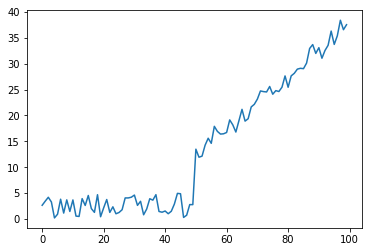

In [140]:
#plot the revenue over time 
plt.plot(time,y)

In [141]:
#create a data frame
df = pd.DataFrame(data={'time': time, 'y': y}, columns=['time', 'y'])
#create a dummy variable for pre/post intervention
df['intervention'] = np.where(df['time']<50, 0, 1) 
df['time_after_intervention'] = np.where(df['time']<50, 0, df['time']-50) 



In [142]:
result = sm.ols(formula="y~ time + intervention+time_after_intervention", data=df).fit()

In [143]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2815.
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           2.15e-93
Time:                        11:56:00   Log-Likelihood:                -168.62
No. Observations:                 100   AIC:                             345.2
Df Residuals:                      96   BIC:                             355.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 